# Investigating the Chemical Properties of Drinking Water: A Statistical Analysis of pH and Conductivity in Potable and Non-Potable Water Sources
### Group 34: Roberto Mulliadi, Brian Suharianto, Yuxin Chen, Angelina Hsu

## Introduction
Access to potable water is a critical aspect for maintaining good public health, as it impacts a wide range of human activities such as drinking, domestic use, agricultural productivity and industrial development. Moreover, the benefits of safe water extend to industrial development and poverty reduction. All the factors mentioned are what allows us to achieve economic prosperity.

Our project aims to analyze how the pH levels and conductivity of water affect its potability. To do this, we will carry out hypothesis testing and construct confidence intervals based on the Water Potability Dataset from Kaggle, which includes data collected from 3276 distinct water bodies across the world. 

We will be using the difference in means for both pH and conductivity as our point estimate, as both variables are Normally distributed, and the sample standard deviation will be the measure of variability. The population of interest would be all water bodies across the world that have the potential to be used as a source of potable water. This includes lakes, rivers, streams, reservoirs, and groundwater sources.



## Research Question
How do pH levels and conductivity affect the potability of all potential sources of drinking water worldwide?

Hypotheses for pH levels, where $\mu_1$ is the mean pH level of potable water and $\mu_2$ is the mean pH level of non-potable water:

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

Hypotheses for Conductivity, where $\mu_1$ is the mean Conductivity of potable water and $\mu_2$ is the mean Conductivity of non-potable water in MicroSiemens/cm

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

## Methodology

## Preliminary Data Analysis

In [2]:
# The following libraries are required to run and visualize the dataset
library(tidyverse, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(infer, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(tidyr, quietly = TRUE)
install.packages("cowplot", quietly = TRUE)
library(cowplot, quietly = TRUE)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [1]:
water_data <- read_csv("water_potability.csv")
head(water_data, 6)

ERROR: Error in read_csv("water_potability.csv"): could not find function "read_csv"


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0.2591551,-0.1394495830,0.1123977,0.8388053,1.70869338,-1.1804704,1.273240605,-1.2861012,0
2,-2.1104392,-2.0361028,-0.3859277338,-0.3076467,NA,2.06226017,0.2705559,-0.622393287,0.6841135,0
3,0.6387237,0.8475354,-0.2400106967,1.3603862,NA,-0.09401776,0.7809976,0.001471379,-1.1671873,0
4,0.7752344,0.5475678,0.0004932291,0.5919175,0.5579943,-0.77871108,1.2549429,2.098631452,0.8482820,0
5,1.2616222,-0.4643582,-0.4601783194,-0.3636424,-0.5707833,-0.34388641,-0.8242313,-2.126632600,0.1387643,0
6,-0.9387754,-0.2450192,0.7680379557,0.2669421,-0.1713654,-1.80314114,-1.7790047,-0.709639884,-1.8030621,0


NULL

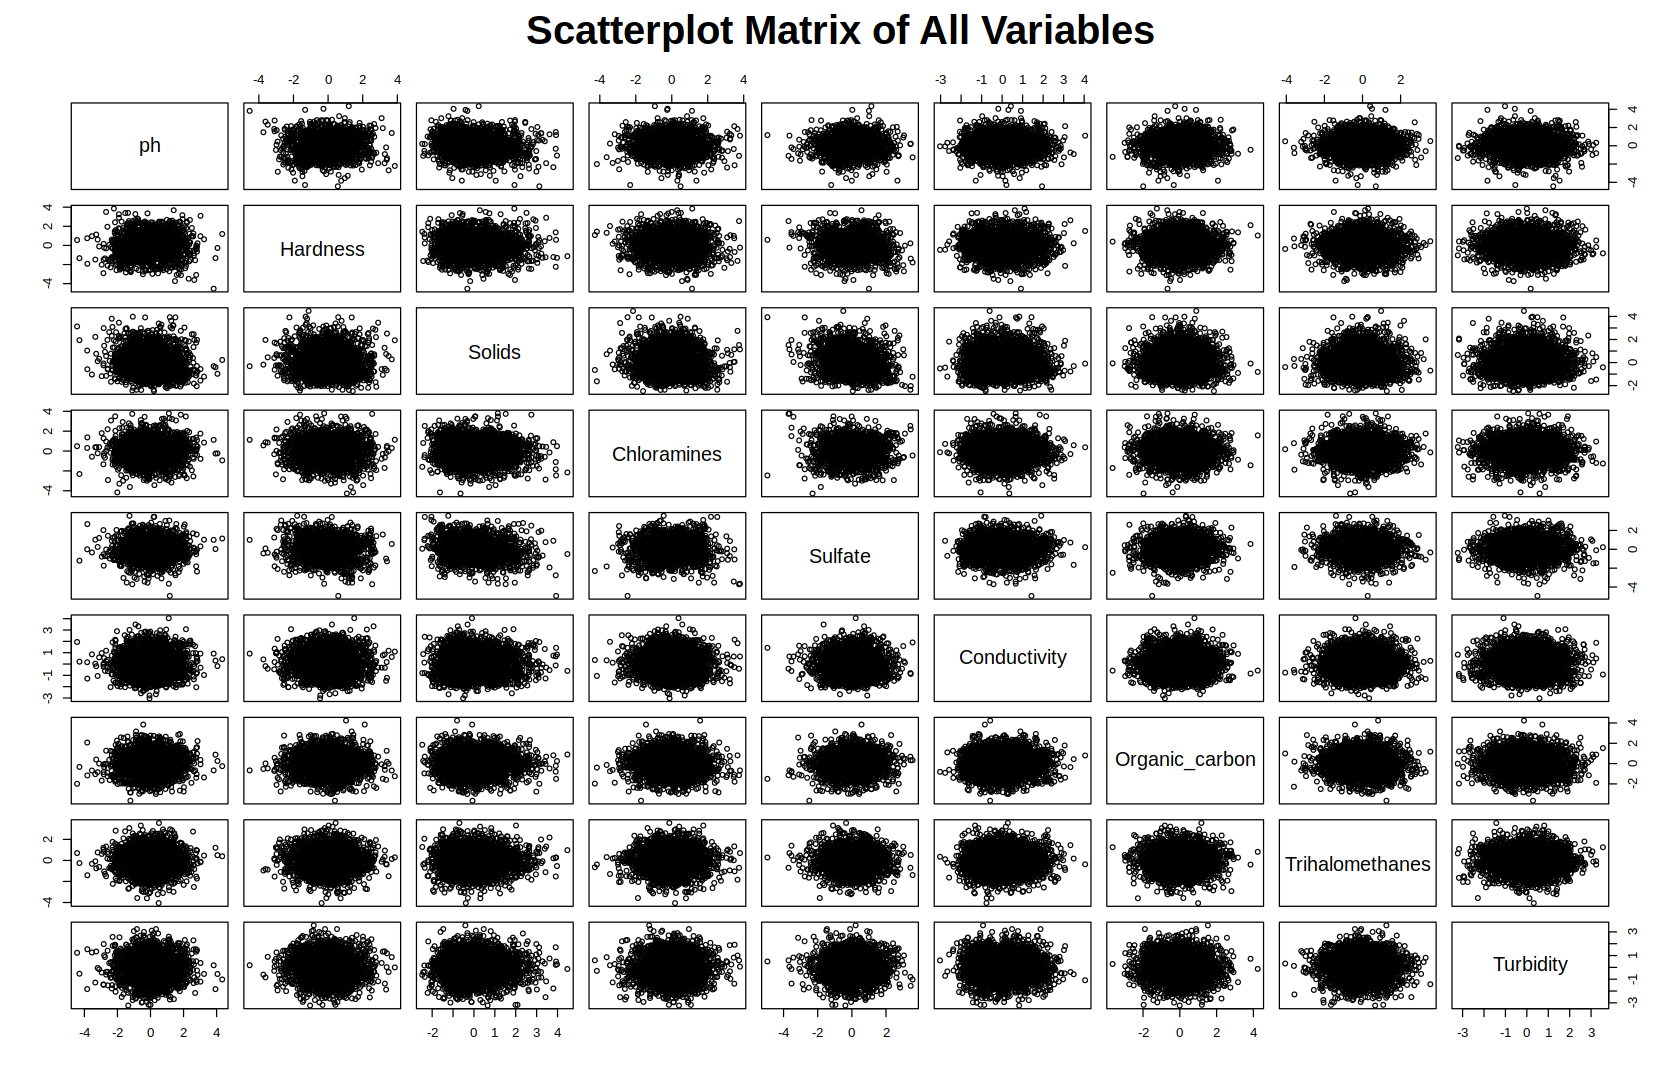

In [30]:
# Resizing the width and height of plots for better/clearer visualization
options(repr.plot.width = 14, repr.plot.height = 9)

# Standardizing all columns except for Potability
water_data_standardized <- scale(water_data[1:9], center = TRUE) |>
    cbind(water_data[10])
head(water_data_standardized, 6)

# Creating a scatterplot matrix of all variables in the dataset
water_scatterplot_matrix <- water_data_standardized[,1:9] |>
    pairs(labels = colnames(water_data_standardized[,1:9]),
          main = "Scatterplot Matrix of All Variables",
          cex = 0.8,
          cex.labels = 1.5,
          cex.main = 2) +
    geom_point(alpha = 0.1)
water_scatterplot_matrix

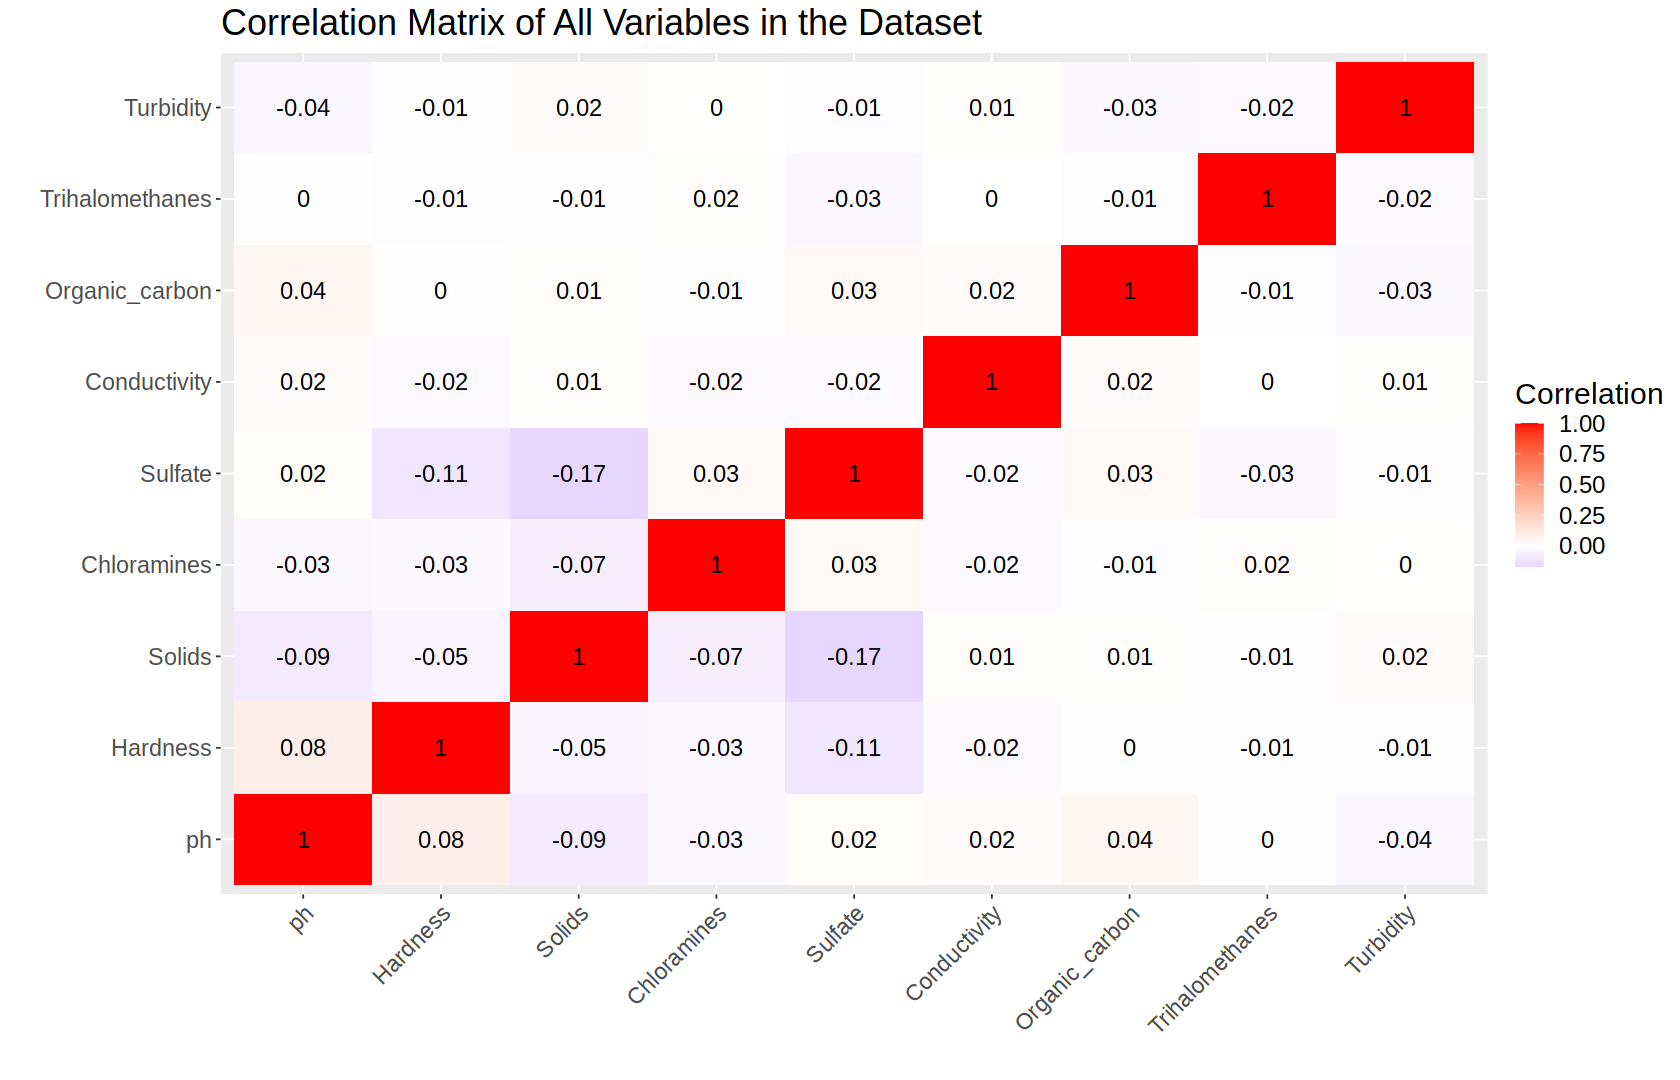

In [34]:
# Create a dataframe with the first and other 8 columns (excluding the 10th)
water_data_corr <- water_data_standardized[, 1:9]

# Compute the correlation matrix while removing any missing values
cor_matrix <- cor(water_data_corr, use = "pairwise.complete.obs")

# Convert the correlation matrix to a long format
cor_matrix_long <- reshape2::melt(cor_matrix)

# Create a correlation matrix plot using ggplot2
ggplot(cor_matrix_long, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
    geom_text(aes(label = round(value, 2)), size = 5) +
    theme(text = element_text(size = 18)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14)) +
    theme(axis.text.y = element_text(size = 14)) +
    
    ggtitle("Correlation Matrix of All Variables in the Dataset") +
    labs(x = "", y = "", fill = "Correlation")

In [51]:
# Splitting the dataset into potable and non-potable water (0 = non-potable, 1 = potable)
# Potable water data
water_data_potable <- water_data |>
    filter(Potability == 1, !is.na(ph), !is.na(Conductivity)) |>
    select(ph, Conductivity, Potability)
head(water_data_potable, 5)
nrow(water_data_potable)

# Non potable water data
water_data_non_potable <- water_data |>
    filter(Potability == 0, !is.na(ph), !is.na(Conductivity)) |>
        select(ph, Conductivity, Potability)
head(water_data_non_potable, 5)
nrow(water_data_non_potable)


ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
9.445130,592.6590,1
9.024845,451.1435,1
6.800119,376.4566,1
7.174135,315.5499,1
7.657991,416.6242,1


[1] 1101

ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
3.716080,592.8854,0
8.099124,418.6062,0
8.316766,363.2665,0
9.092223,398.4108,0
5.584087,280.4679,0


[1] 1684

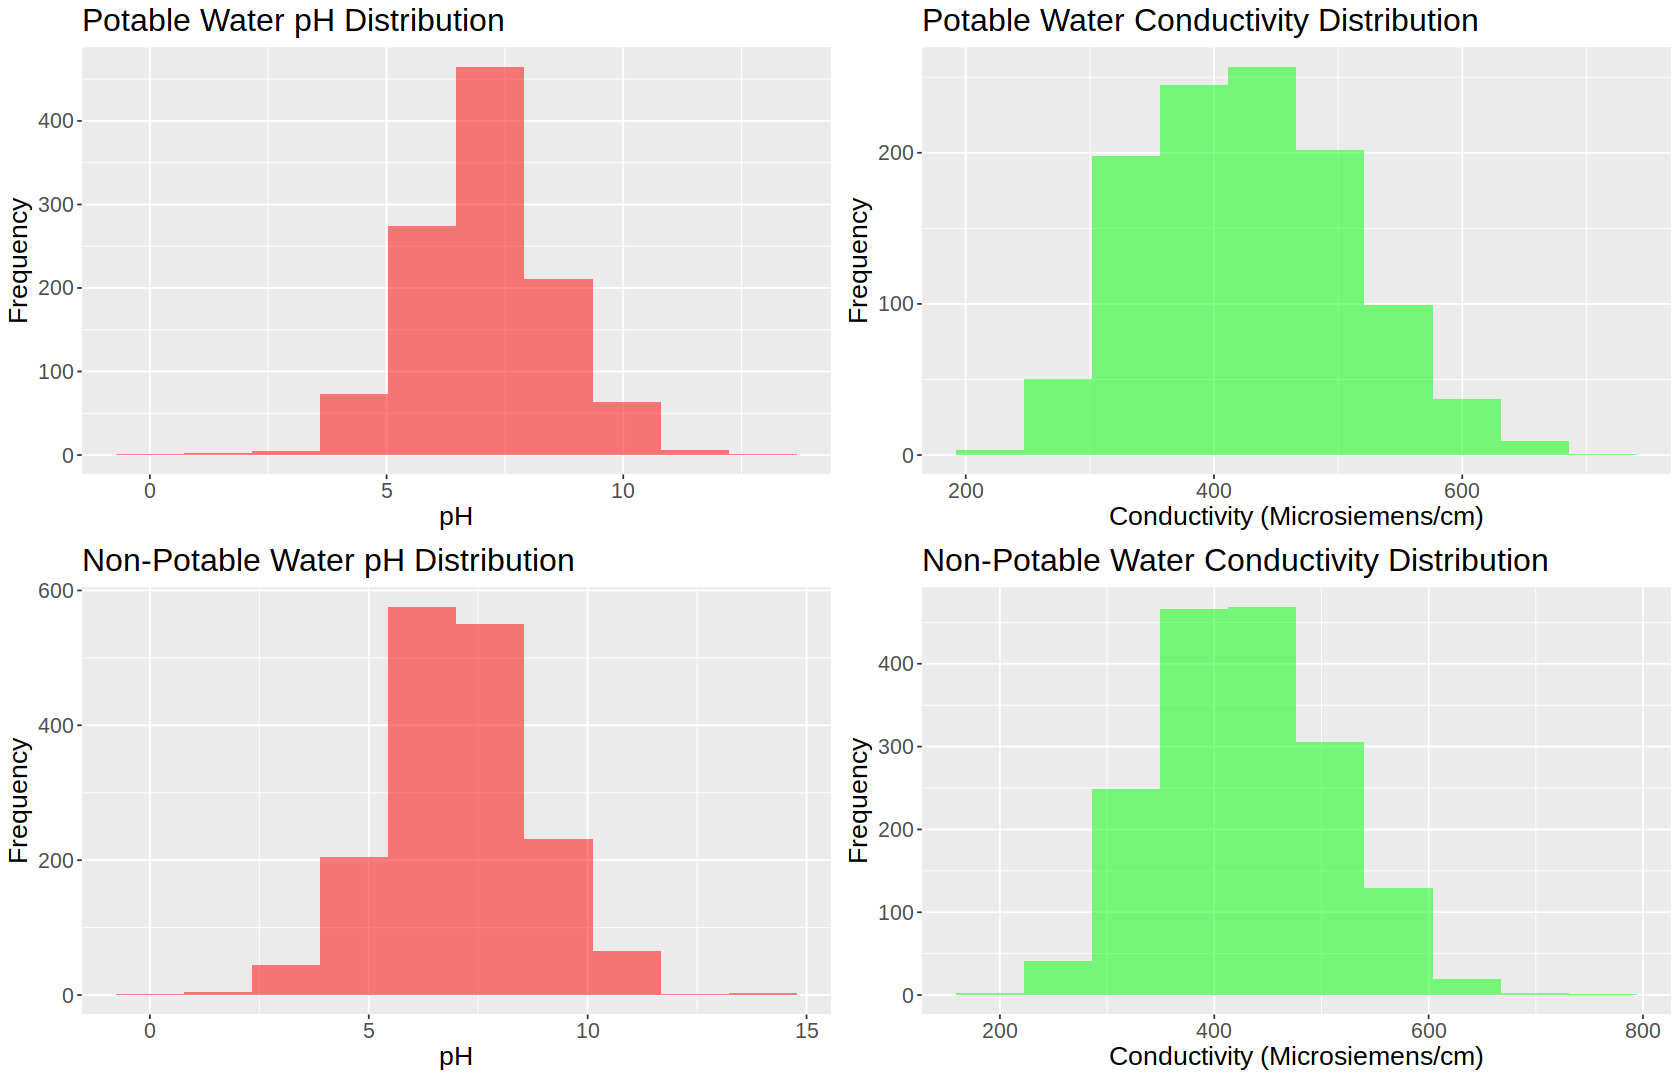

In [82]:
# Plotting the distribution of ph and Conductivity for potable water
# Create histogram for pH of potable water
potable_water_ph <- ggplot(water_data_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 10, fill = "red") +
    labs(title = "Potable Water pH Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of potable water
potable_water_conductivity <- ggplot(water_data_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 10, fill = "green") +
    labs(title = "Potable Water Conductivity Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Plotting the distribution of ph and Conductivity for non-potable water
# Create histogram for pH of non-potable water
non_potable_water_ph <- ggplot(water_data_non_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 10, fill = "red") +
    labs(title = "Non-Potable Water pH Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of non-potable water
non_potable_water_conductivity <- ggplot(water_data_non_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 10, fill = "green") +
    labs(title = "Non-Potable Water Conductivity Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Combine all histograms into a single plot
combined_plot <- plot_grid(potable_water_ph, potable_water_conductivity,
                              non_potable_water_ph, non_potable_water_conductivity,
                              ncol = 2)
combined_plot
    

In [89]:
summary_statistics_potable <- water_data_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity))
summary_statistics_potable

summary_statistics_non_potable <- water_data_non_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity))
summary_statistics_non_potable

mean_ph,mean_conductivity
<dbl>,<dbl>
7.073783,426.5484


mean_ph,mean_conductivity
<dbl>,<dbl>
7.085378,427.4242
